In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
df = data.copy()
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.shape

(4600, 18)

In [5]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
X = df.drop(["date",'street', 'city','statezip', 'country','price'], axis=1)
y = df[['price']]
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
mlrm = LinearRegression()

mlrm.fit(train_X,train_y)

mlrm.score(train_X, train_y)*100

39.118391486488605

In [8]:
mlrm.score(test_X, test_y)*100

9.612104439332525

In [9]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [10]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [11]:
df[df==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

In [12]:
df[df["price"]==0].head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4362,2014-05-07 00:00:00,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4374,2014-05-09 00:00:00,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4376,2014-05-09 00:00:00,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4382,2014-05-12 00:00:00,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4383,2014-05-13 00:00:00,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


In [13]:
df =df[(df['bedrooms']!=0) & (df['bathrooms']!=0)]

C:\Users\popan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot of Price')

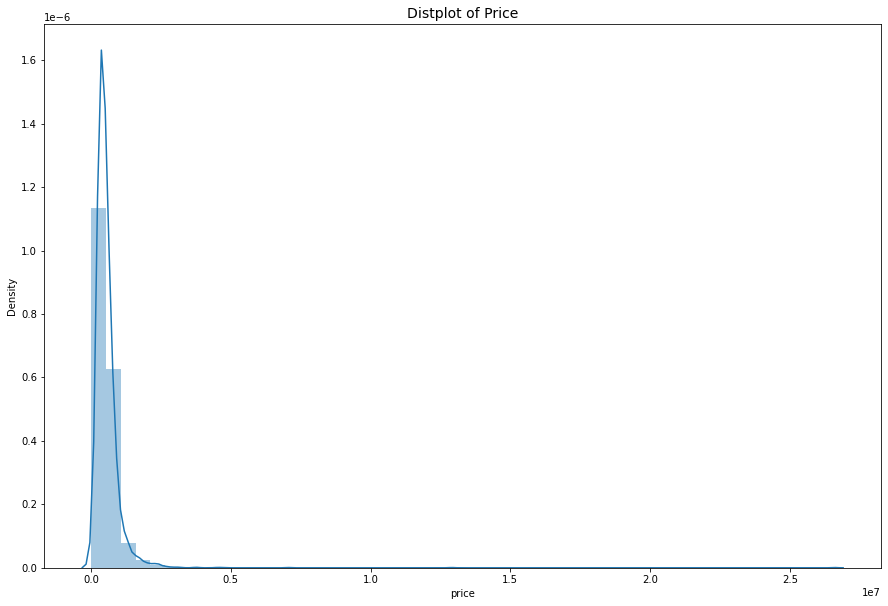

In [14]:
plt.figure(figsize=(15,10))
ax = sns.distplot(df['price'], kde=True)
ax.set_title('Distplot of Price', fontsize=14)

In [15]:
from scipy import stats
df['price'] = df['price'].replace([data['price'][np.abs(stats.zscore(data['price'])) > 3]],np.median(df['price']))

C:\Users\popan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot of Price')

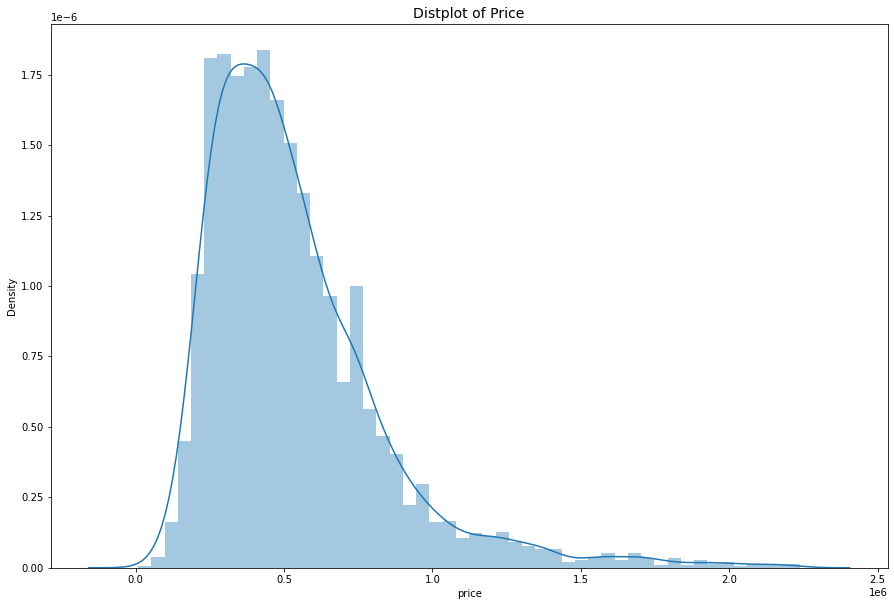

In [20]:
plt.figure(figsize=(15,10))
ax = sns.distplot(df['price'], kde=True)
ax.set_title('Distplot of Price', fontsize=14)

Text(0.5, 1.0, 'Sqft_living VS Price')

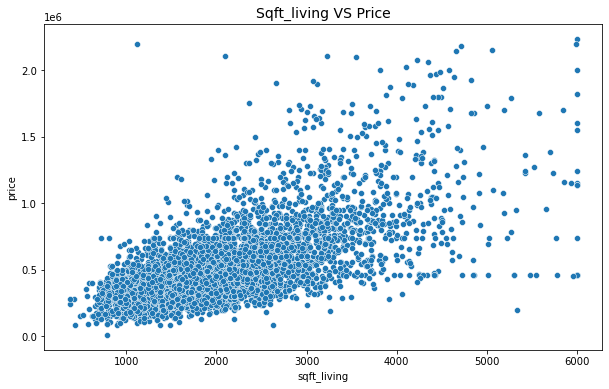

In [21]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=df, x="sqft_living", y="price")
ax.set_title('Sqft_living VS Price', fontsize=14)

In [18]:
df['sqft_living'] = np.where((df.sqft_living >6000 ), 6000, df.sqft_living)

In [19]:
 df['price'].replace(to_replace = 0, value = 735000, inplace = True)
 len(df[(df['price'] == 0)])

0

Text(0.5, 1.0, 'Sqft_lot VS Price')

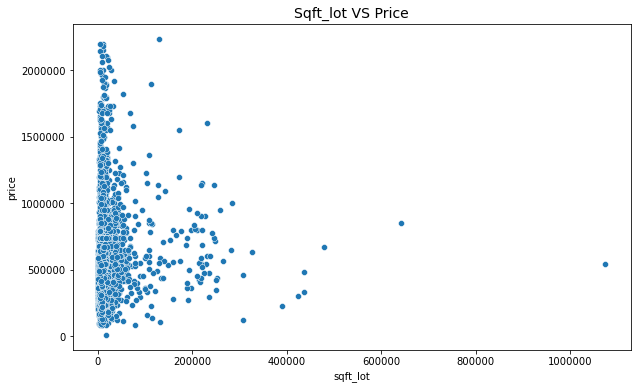

In [22]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=df, x="sqft_lot", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Sqft_lot VS Price', fontsize=14)

Text(0.5, 1.0, 'Sqft_above VS Price')

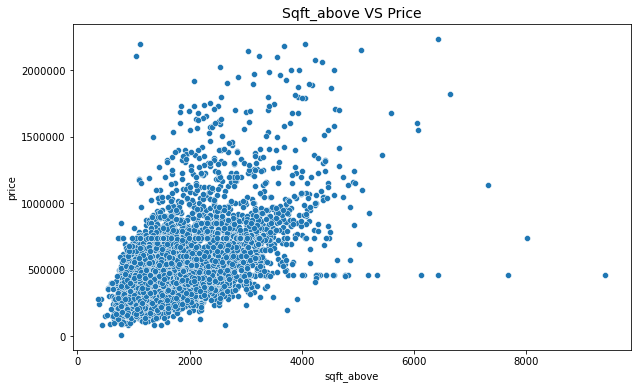

In [23]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=df, x="sqft_above", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Sqft_above VS Price', fontsize=14)

In [24]:
df['sqft_above'] = np.where((df.sqft_above >5000 ), 5000, df.sqft_above)

Text(0.5, 1.0, 'Sqft_basement VS Price')

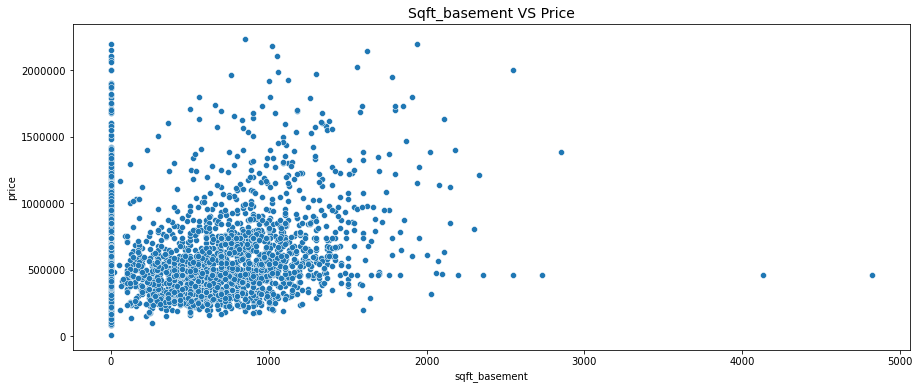

In [25]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=df, x="sqft_basement", y="price")
ax.ticklabel_format(style='plain')
ax.set_title('Sqft_basement VS Price', fontsize=14)

In [26]:
df['sqft_basement'] = np.where((df.sqft_basement >2000 ), 2000, df.sqft_basement)

Text(0.5, 1.0, 'Bedrooms VS Price')

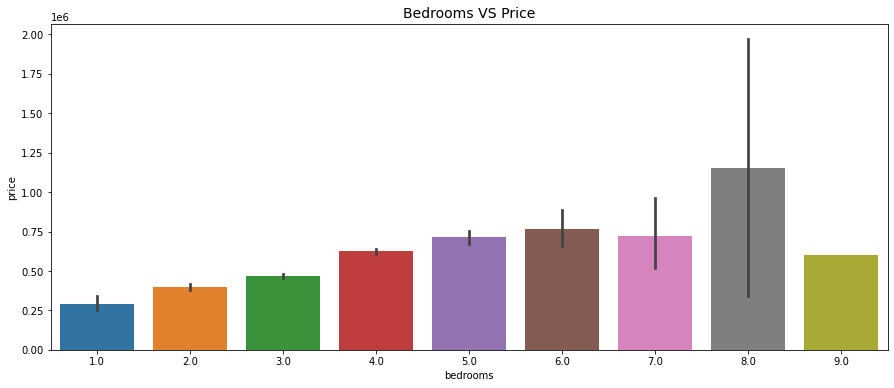

In [27]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bedrooms'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Price', fontsize=14)

In [28]:
df['bedrooms'].nunique()

9

In [29]:
bedroom = df.groupby(['bedrooms']).price.agg([len, min, max])
bedroom

,len,min,max
bedrooms,,,
1.0,38,80000.0,735000.0
2.0,566,7800.0,1695000.0
3.0,2032,83300.0,2147500.0
4.0,1531,84350.0,2199900.0
5.0,353,185000.0,2238888.0
6.0,61,175000.0,2180000.0
7.0,14,280000.0,1950000.0
8.0,2,340000.0,1970000.0
9.0,1,599999.0,599999.0


In [30]:
df['bedrooms'] = np.where((df.bedrooms >6 ), 6, df.bedrooms)

Text(0.5, 1.0, 'Bathrooms VS Price')

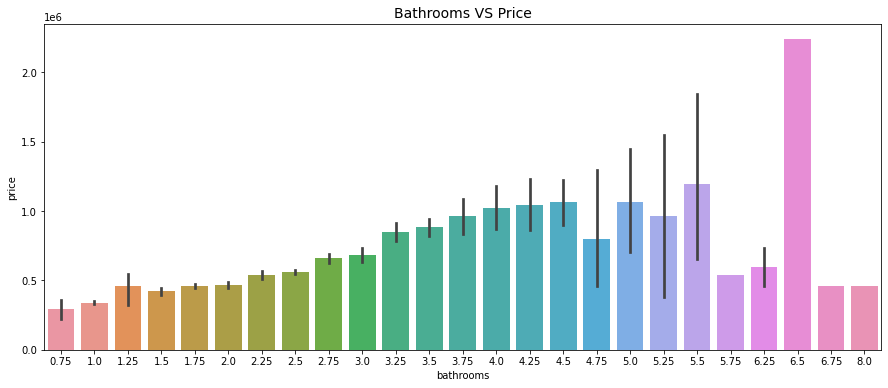

In [31]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bathrooms'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bathrooms VS Price', fontsize=14)

In [32]:
df.groupby(['bathrooms']).price.agg([len, min, max])

,len,min,max
bathrooms,,,
0.75,17,8.000000e+04,5.621000e+05
1.00,743,7.800000e+03,2.110000e+06
1.25,3,3.219500e+05,5.450000e+05
1.50,291,1.075000e+05,2.199900e+06
1.75,629,1.207500e+05,2.100000e+06
2.00,427,8.330000e+04,1.755000e+06
2.25,419,1.322500e+05,2.110000e+06
2.50,1189,1.680000e+05,1.920000e+06
2.75,276,1.880000e+05,2.180000e+06


In [33]:
df['bathrooms'].nunique()

25

In [34]:
df['bathrooms'] = np.where((df.bathrooms == 0.75), 1, df.bathrooms)
df['bathrooms'] = np.where((df.bathrooms == 1.25 ), 1, df.bathrooms)
df['bathrooms'] = np.where((df.bathrooms > 4.75 ), 5, df.bathrooms)

Text(0.5, 1.0, 'Floors VS Price')

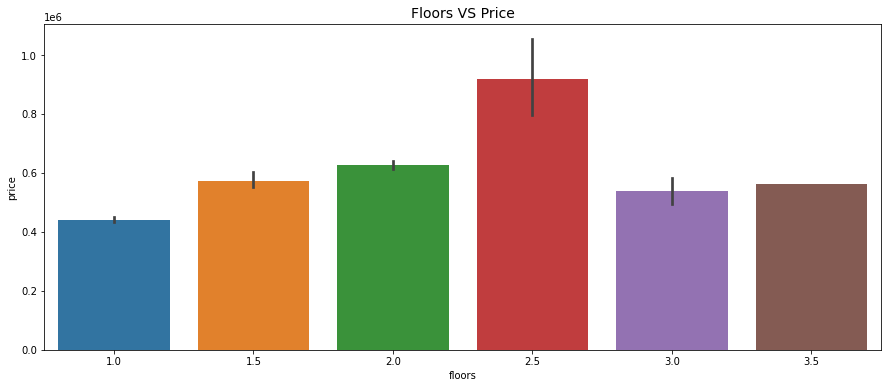

In [35]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['floors'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Floors VS Price', fontsize=14)

In [36]:
floor = df.groupby(['floors']).price.agg([len , min, max])
floor

,len,min,max
floors,,,
1.0,2174,7800.0,2199900.0
1.5,444,132500.0,2027000.0
2.0,1810,84350.0,2238888.0
2.5,41,195000.0,1990000.0
3.0,128,288790.0,2000000.0
3.5,1,563500.0,563500.0


In [37]:
df['floors'] = np.where((df.floors == 3.5 ), 3, df.floors)

Text(0.5, 1.0, 'Waterfront VS Price')

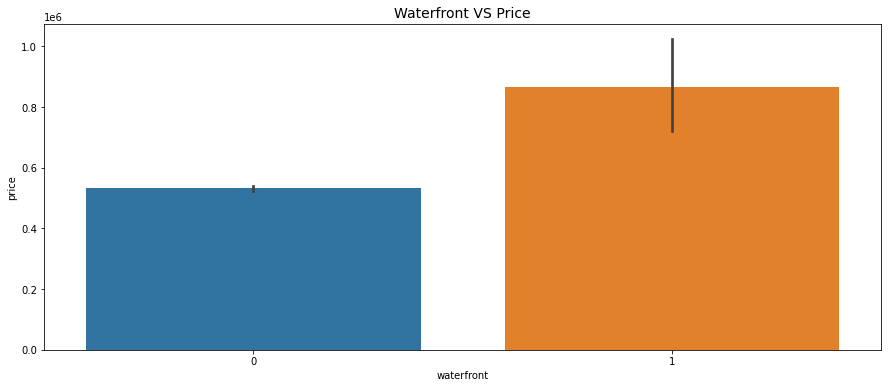

In [38]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['waterfront'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Waterfront VS Price', fontsize=14)

In [39]:
waterfront = df.groupby(['waterfront']).price.agg([len , min, max])
waterfront

,len,min,max
waterfront,,,
0,4565,7800.0,2238888.0
1,33,385000.0,2200000.0


Text(0.5, 1.0, 'View VS Price')

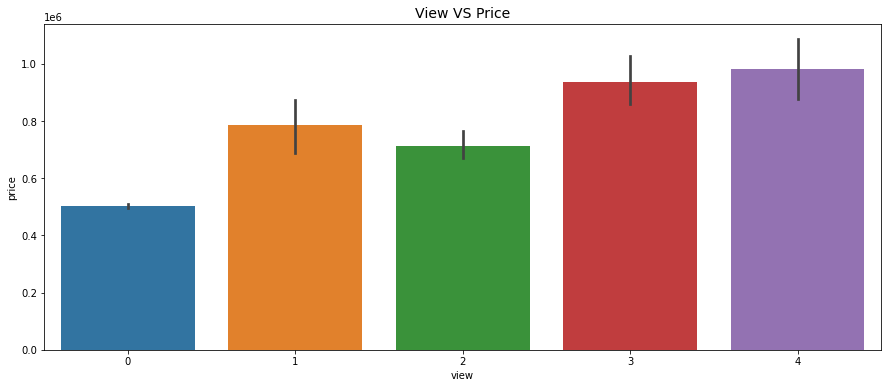

In [40]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['view'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('View VS Price', fontsize=14)

In [41]:
view = df.groupby(['view']).price.agg([len , min, max])
view

,len,min,max
view,,,
0,4139,7800.000000,2238888.0
1,69,180785.714286,1965221.0
2,204,175000.000000,1925000.0
3,116,107500.000000,2180000.0
4,70,361000.000000,2200000.0


Text(0.5, 1.0, 'Condition VS Price')

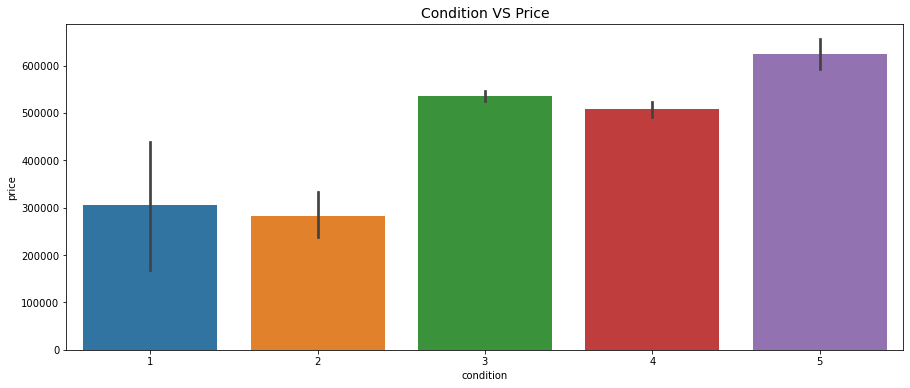

In [42]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['condition'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Condition VS Price', fontsize=14)

In [43]:
condition = df.groupby(['condition']).price.agg([len , min, max])
condition

,len,min,max
condition,,,
1,6,7800.0,550000.0
2,32,80000.0,735000.0
3,2873,83000.0,2238888.0
4,1252,83300.0,2110000.0
5,435,83300.0,2147500.0


In [44]:
df['condition'] = np.where((df.condition == 1 ), 2, df.condition)

In [45]:
X = df.drop(["date",'street', 'city','statezip','sqft_lot','country','price','yr_built','yr_renovated'], axis=1)
y = df[['price']]
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
mlrm = LinearRegression()

mlrm.fit(train_X,train_y)

mlrm.score(train_X, train_y)*100

45.48852173280372

In [46]:
df.drop(["date",'yr_built','yr_renovated','sqft_lot'], axis=1, inplace = True)

Text(0.5, 1.0, 'CORRELATION MATRIX')

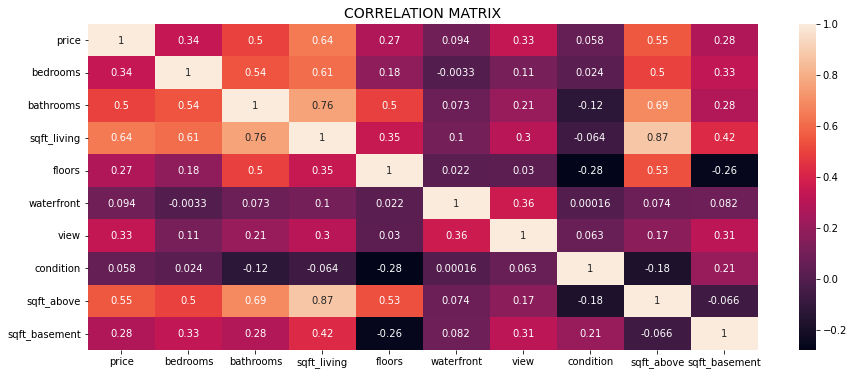

In [47]:
plt.figure(figsize=(15,6))
ax = sns.heatmap(df.corr(),annot = True)
ax.set_title('CORRELATION MATRIX', fontsize=14)

In [48]:

df.drop(['waterfront','condition','sqft_above'],axis=1, inplace=True)

In [49]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
floors           float64
view               int64
sqft_basement      int64
street            object
city              object
statezip          object
country           object
dtype: object

In [50]:
city = df.groupby(['city']).price.agg([len, min, max])
pd.set_option('display.max_rows',70)
city

,len,min,max
city,,,
Algona,5,100000.000000,262000.0
Auburn,176,87500.000000,900000.0
Beaux Arts Village,1,745000.000000,745000.0
Bellevue,286,248000.000000,2150000.0
Black Diamond,9,224000.000000,735000.0
Bothell,33,347000.000000,749995.0
Burien,74,100000.000000,1035000.0
Carnation,22,80000.000000,1680000.0
Clyde Hill,11,460443.461539,1388000.0


In [51]:
df.drop(['street','city','country'],axis=1, inplace=True)

In [52]:
df = pd.get_dummies(df, columns=['statezip'], prefix = ['statezip'])

df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_basement,statezip_WA 98001,statezip_WA 98002,statezip_WA 98003,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.000000,3.0,1.50,1340,1.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,460443.461539,5.0,2.50,3650,2.0,4,280,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,342000.000000,3.0,2.00,1930,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.000000,3.0,2.25,2000,1.0,0,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.000000,4.0,2.50,1940,1.0,0,800,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df.shape

(4598, 84)

In [54]:
X = df.drop(["price"],axis = 1)
y = df["price"]

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.2, random_state=8)

In [55]:
mlrm = LinearRegression()

mlrm.fit(train_X,train_y)

mlrm.score(train_X, train_y)*100

67.77824654563024

In [94]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score

In [97]:
clf = DecisionTreeRegressor()
clf.fit(train_X ,train_y)
y_pred_train = clf.predict(train_X)

In [98]:
y_pred_test = clf.predict(test_X)

In [89]:
train_X.shape


(3678, 83)

In [90]:
train_y.shape


(3678,)

In [91]:

test_X.shape


(920, 83)

In [92]:

test_y.shape

(920,)

In [99]:
r2_score(test_y ,y_pred_test)

0.44701035456241545

In [100]:
r2_score(train_y ,y_pred_train)

0.9992488010447557

# there is overfit 